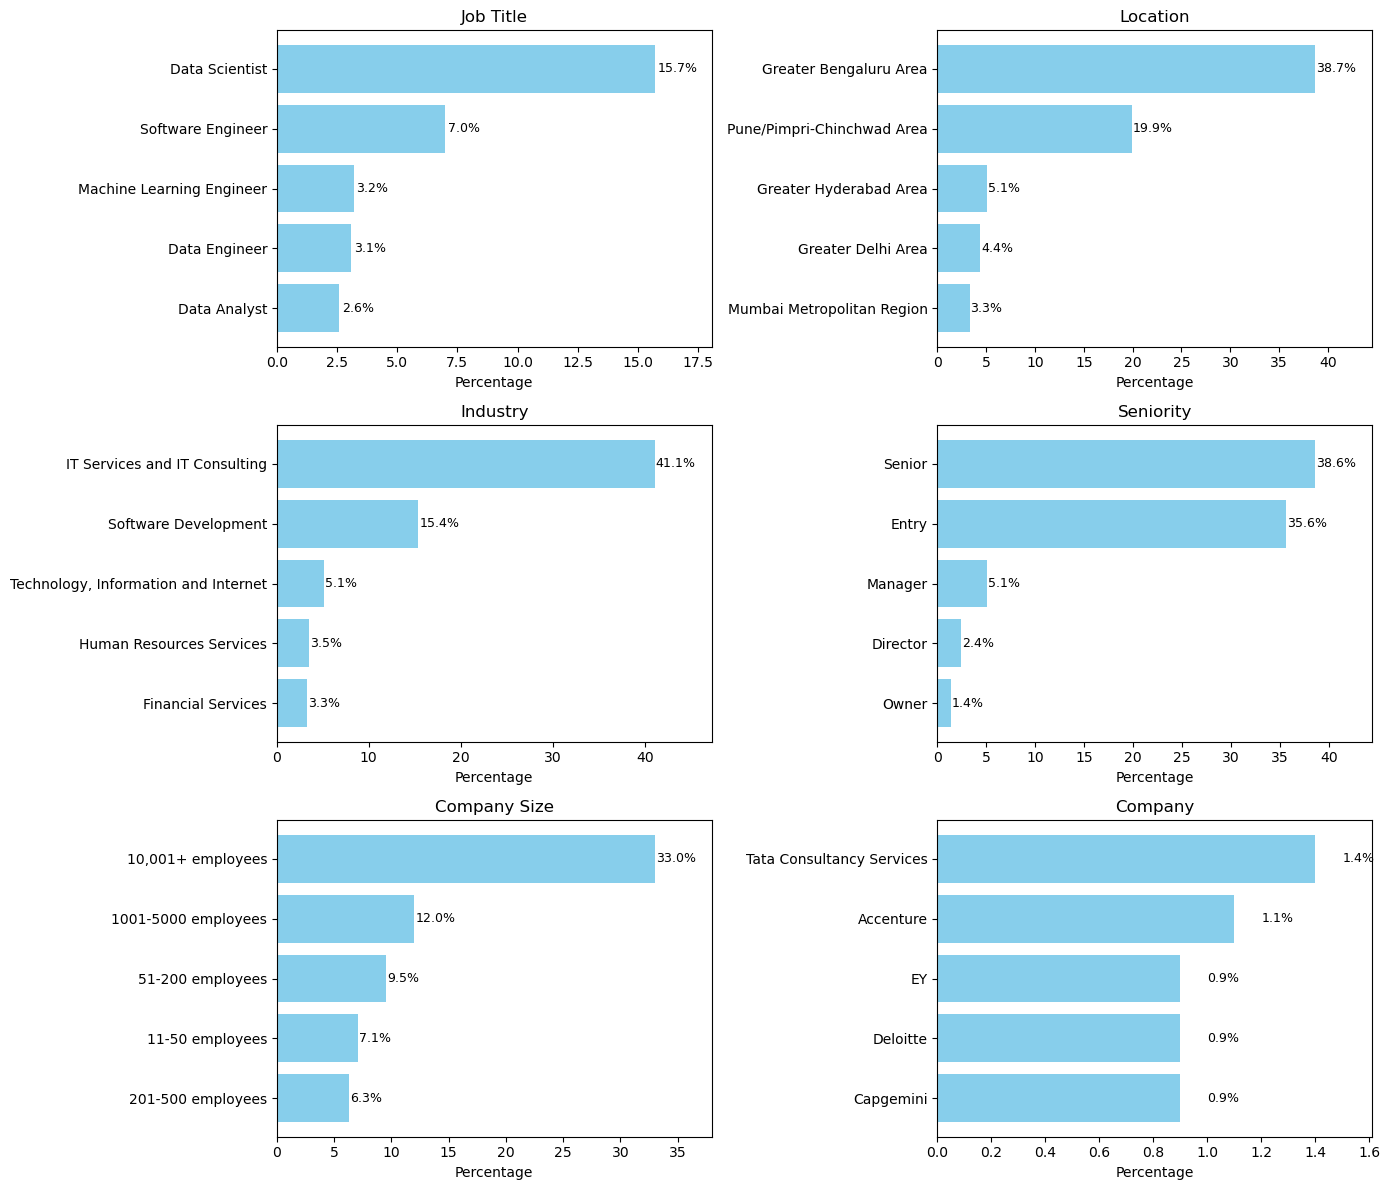

In [8]:
# ----------------------------------------
# Import the plotting library (Matplotlib)
# ----------------------------------------
# matplotlib.pyplot is the state‑machine interface that gives
# simple commands (plot, bar, barh, etc.).  We alias it as plt
# for brevity in later calls.
import matplotlib.pyplot as plt


# -----------------------------------------------------------------
# Create a nested dictionary called `categories` to hold the data.
# Each top‑level key (e.g., "Job Title") is a chart title, and its
# value is another dict that maps category labels to percentages.
# -----------------------------------------------------------------
categories = {
    "Job Title": {
        "Data Scientist": 15.7,
        "Software Engineer": 7.0,
        "Machine Learning Engineer": 3.2,
        "Data Engineer": 3.1,
        "Data Analyst": 2.6,
    },
    "Location": {
        "Greater Bengaluru Area": 38.7,
        "Pune/Pimpri-Chinchwad Area": 19.9,
        "Greater Hyderabad Area": 5.1,
        "Greater Delhi Area": 4.4,
        "Mumbai Metropolitan Region": 3.3,
    },
    "Industry": {
        "IT Services and IT Consulting": 41.1,
        "Software Development": 15.4,
        "Technology, Information and Internet": 5.1,
        "Human Resources Services": 3.5,
        "Financial Services": 3.3,
    },
    "Seniority": {
        "Senior": 38.6,
        "Entry": 35.6,
        "Manager": 5.1,
        "Director": 2.4,
        "Owner": 1.4,
    },
    "Company Size": {
        "10,001+ employees": 33.0,
        "1001-5000 employees": 12.0,
        "51-200 employees": 9.5,
        "11-50 employees": 7.1,
        "201-500 employees": 6.3,
    },
    "Company": {
        "Tata Consultancy Services": 1.4,
        "Accenture": 1.1,
        "EY": 0.9,
        "Deloitte": 0.9,
        "Capgemini": 0.9,
    },
}


# -------------------------------------------------------------------------
# Create a 3 × 2 grid of sub‑plots (6 axes total) to host our bar charts.
# -------------------------------------------------------------------------
# plt.subplots parameters explained:
#   nrows=3   -> three rows of sub‑plots
#   ncols=2   -> two columns (so 3×2 = 6 charts)
#   figsize   -> (width, height) in inches; here 14×12 gives a landscape‑
#                style figure large enough that labels remain readable.
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))

# Flatten the 2‑D ndarray of Axes into a simple 1‑D list so we can
# iterate over it together with our data dictionaries.
axes = axes.flatten()


# ----------------------------------------------------------------
# Iterate over each subplot axis *and* each category in `categories`
# ----------------------------------------------------------------
for ax, (title, data) in zip(axes, categories.items()):
    
    # Extract labels and values from the inner dictionary
    labels = list(data.keys())      # e.g., ["Data Scientist", ...]
    values = list(data.values())    # e.g., [15.7, 7.0, ...]
    
    # -------------------------------------------------------------
    # Draw a horizontal bar chart on the current axis.
    # -------------------------------------------------------------
    # ax.barh parameters explained:
    #   y      -> sequence of labels (the categories)
    #   width  -> sequence of numeric values (the bar lengths)
    #   color  -> bar color; a friendly sky‑blue here
    bars = ax.barh(labels, values, color='skyblue')
    
    # Give the subplot a title (e.g., "Job Title", "Location", ...)
    ax.set_title(title)
    
    # Label the x‑axis so the viewer knows the units (percentages).
    ax.set_xlabel("Percentage")
    
    # Flip the y‑axis so the first label appears at the top.
    ax.invert_yaxis()


    #   Calculate a right‑hand x‑axis limit so text fits
    #   max(values)  -> largest percentage in this subplot
    #   1.15         -> 15 % padding factor
    ax.set_xlim(0, max(values) * 1.15)
    
    
    # ---------------------------------------------------------
    # Annotate each bar with its percentage value.
    # ---------------------------------------------------------
    for bar, value in zip(bars, values):
        # ax.text parameters explained:
        #   x position -> bar.get_width()   : the bar length
        #                 + 0.5             : small offset so text is
        #                                     just outside the bar
        #   y position -> bar.get_y() + bar.get_height()/2
        #                 Centers the text vertically on the bar
        #   s          -> f"{value}%"       : the text string to draw
        #   va='center'  Vertical alignment so text is centered
        #   fontsize=9   A readable but compact font size
        ax.text(
            bar.get_width()+0.1,
            bar.get_y() + bar.get_height() / 2,
            f"{value}%",
            va='center',
            fontsize=9
        )


# -------------------------------------------------------------------------
# Adjust subplot spacing so titles/labels don’t overlap, then display.
# -------------------------------------------------------------------------
plt.tight_layout()   # Automatically tweak spacing for a clean look
plt.show()           # Render the figure window (or inline in a notebook)
